# Bankruptcy Prediction

In [1]:
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/JVW/Desktop/bankdata.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.mean()

Bankrupt?                                                   0.032263
 ROA(C) before interest and depreciation before interest    0.505180
 ROA(A) before interest and % after tax                     0.558625
 ROA(B) before interest and depreciation after tax          0.553589
 Operating Gross Margin                                     0.607948
                                                              ...   
 Liability to Equity                                        0.280365
 Degree of Financial Leverage (DFL)                         0.027541
 Interest Coverage Ratio (Interest expense to EBIT)         0.565358
 Net Income Flag                                            1.000000
 Equity to Liability                                        0.047578
Length: 96, dtype: float64

In [4]:
datacopy = data
datacopy.drop(['Bankrupt?'],axis=1)
normalized_df = datacopy/datacopy.mean()
normalized_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,30.995455,0.733589,0.759704,0.732944,0.989323,0.989354,1.000214,0.999620,0.999661,0.996784,...,0.887448,4.948861e-10,0.998340,0.989320,0.985112,1.035085,0.965851,0.997687,1.0,0.346139
1,30.995455,0.919061,0.963462,0.933419,1.003762,1.003793,1.000191,1.000239,1.000268,0.999781,...,0.984571,4.467827e-10,0.999579,1.003767,0.999485,1.012415,9.606611,1.008520,1.0,0.437054
2,30.995455,0.843405,0.893298,0.853152,0.989312,0.989199,1.000102,0.999014,0.999140,0.994771,...,0.959034,2.147295e-09,0.999882,0.989313,0.995683,1.035038,0.964184,0.997078,1.0,0.346252
3,30.995455,0.791489,0.807813,0.826847,0.959854,0.959883,0.999945,0.999721,0.999854,0.999100,...,0.915562,1.745881e-10,0.998420,0.959851,0.993212,1.004837,0.969337,0.998772,1.0,0.504060
4,30.995455,0.920509,0.963853,0.943476,0.984925,0.984956,1.000218,1.000221,1.000272,0.999513,...,0.984223,2.081419e-10,0.999369,0.984925,0.999489,0.993397,0.898723,1.018146,1.0,0.745932


In [5]:
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.897089e-03,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.833504e-02,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.201838e-14,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.123435e-13,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.366372e-13,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [6]:
variance = np.var(normalized_df, axis=0)
var_df = pd.DataFrame(variance, columns=['Variance'])
var_df.sort_values(by='Variance').style.background_gradient(sns.light_palette('red', as_cmap=True))

,Variance
Net Income Flag,0.000000
Operating Profit Growth Rate,0.000161
Operating Profit Rate,0.000170
Cash Flow to Sales,0.000193
Working capitcal Turnover Rate,0.000227
Working Capital/Equity,0.000252
Pre-tax net Interest Rate,0.000261
Continuous interest rate (after tax),0.000263
After-tax net Interest Rate,0.000283
Net Income to Stockholder's Equity,0.000299


In [7]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold):
    average = np.mean(data, axis=0)
    selector = VarianceThreshold(threshold).fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

variancethreshold = VarianceThreshold(0.0035).fit(scaled_data)
highvariancecol = data.columns[variancethreshold.get_support()]
lowvariancecol = data.columns[~variancethreshold.get_support()]

print("Number of Columns Removed  :",len(lowvariancecol))
print("Number of Columns Remaining :",len(highvariancecol))

Number of Columns Removed  : 75
Number of Columns Remaining : 21


In [8]:
highvariancecol

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Total Asset Growth Rate', ' Total Asset Turnover',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Quick Assets/Total Assets', ' Current Assets/Total Assets',
       ' Cash/Total Assets', ' Current Liabilities/Liability',
       ' Long-term Liability to Current Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Current Liability to Liability'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

The data.info result is very informative.

1.There are 6819 observations for each of our 96 features.

2.All of the features are numerical (int64 or float64)#Makes making a corplot much easier

3.There are no missing values in any of the 96 features.

In [10]:
# Computing the descriptive statistics of our numrerical features
data.describe()
#Create data dictionary for column names

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


There seems to be much more 0's than 1's for our response variable. This will lead to a class imablance and I will probably use SMOTE to rextify this situation.

I also see that there are larger values in 'Total assets to GNP price.' Machine learning algorithms will give more importance to variables on a larger scale thus ill have to scale the data

In [11]:
#We need to check for duplicates just in case company's were reviewed more than onece
data.duplicated().sum()

0

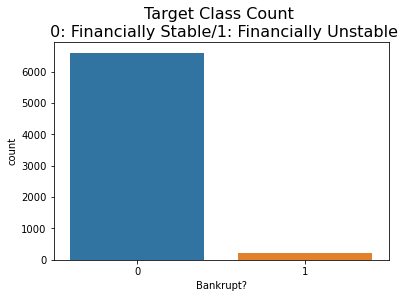

In [12]:
sns.countplot(x = data['Bankrupt?'])
plt.title('Target Class Count \n 0: Financially Stable/1: Financially Unstable', fontsize=16)
plt.show()

In [13]:
#I want to see specifically how much more the 0's make up the data rather than 
print('Financially stable: ', round(data['Bankrupt?'].value_counts()[0],2))
print('Financially unstable: ', round(data['Bankrupt?'].value_counts()[1],2))

Financially stable:  6599
Financially unstable:  220


This is further proof that I need to use SMOTE or some other smapling method to fix the class imbalance

In [8]:
#pip install imbalanced-learn
#pip install delayed

Fraction-only Columns Are Columns Where The Values Are Already In Between [0,1]

In [9]:
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (data[col].max()<=1) & (data[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=data.drop(['Bankrupt?'],axis=1))
non_fraction_columns = data.drop(['Bankrupt?'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 71 	 # Other than Fraction-only Columns 24


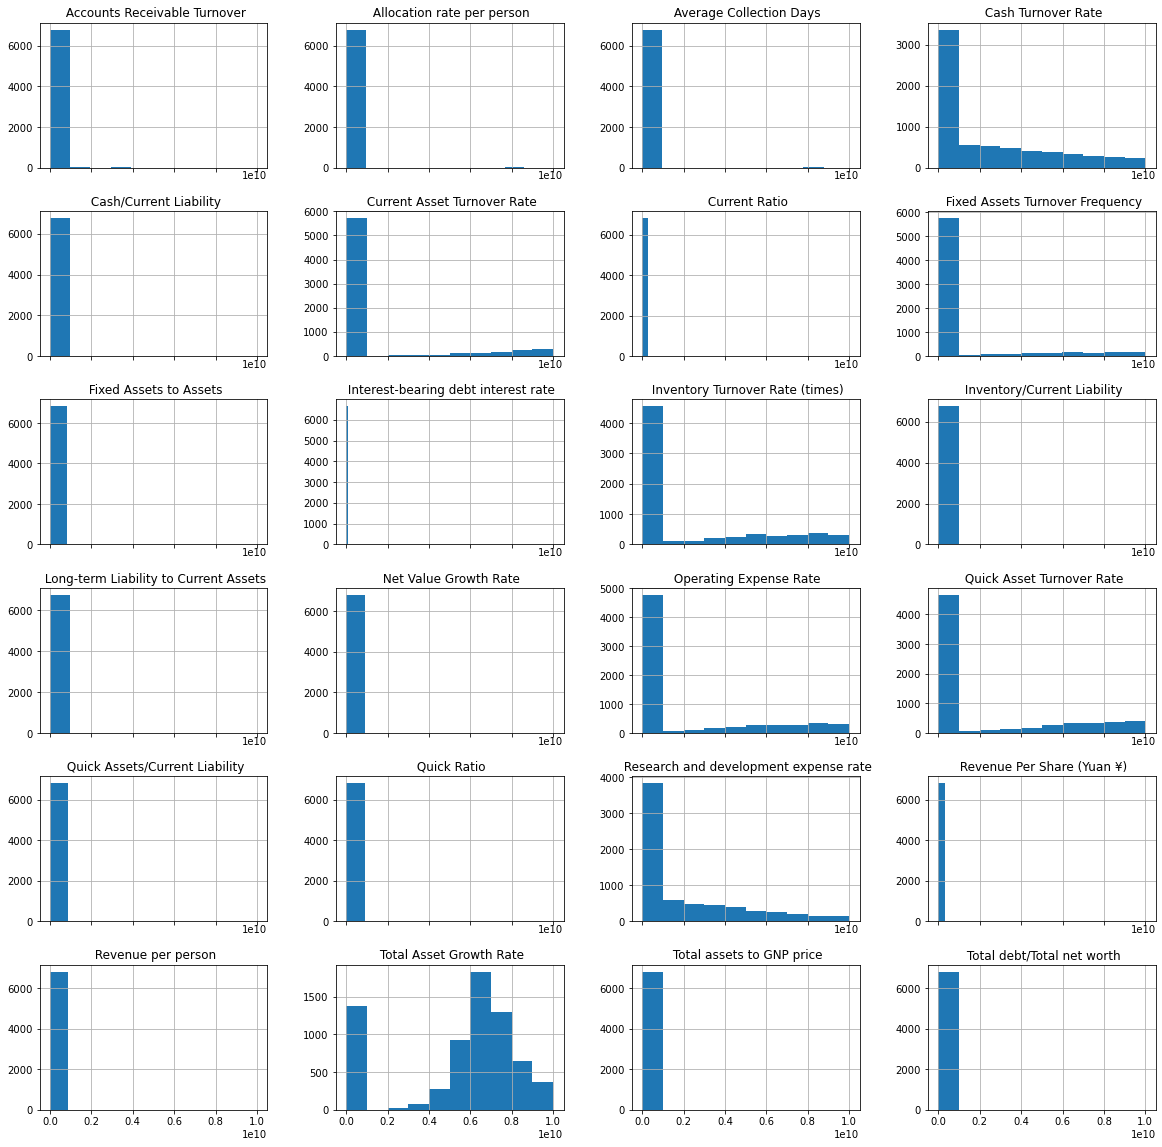

In [10]:
data[non_fraction_columns].hist(figsize= (20,20),sharex=True,layout= (6,4))
plt.show()

In [11]:
#ALL FEATURES FROM VARAIANCE THRESHOLD
newdf = data[['Bankrupt?', ' Interest-bearing debt interest rate',
       ' Revenue Per Share (Yuan ¥)', ' Net Value Growth Rate',
       ' Current Ratio', ' Quick Ratio', ' Total debt/Total net worth',
       ' Long-term fund suitability ratio (A)',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Allocation rate per person', ' Quick Assets/Current Liability',
       ' Cash/Current Liability', ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets', ' Total income/Total expense',
       ' Current Asset Turnover Rate', ' Fixed Assets to Assets',
       ' Liability-Assets Flag', ' Total assets to GNP price']]

final_features =  data[['Bankrupt?',' Interest-bearing debt interest rate',' Quick Ratio',
                       ' Net Value Growth Rate',' Accounts Receivable Turnover',
                       ' Total debt/Total net worth',' Debt ratio %', 
                        ' Operating Profit Rate',' Persistent EPS in the Last Four Seasons']]

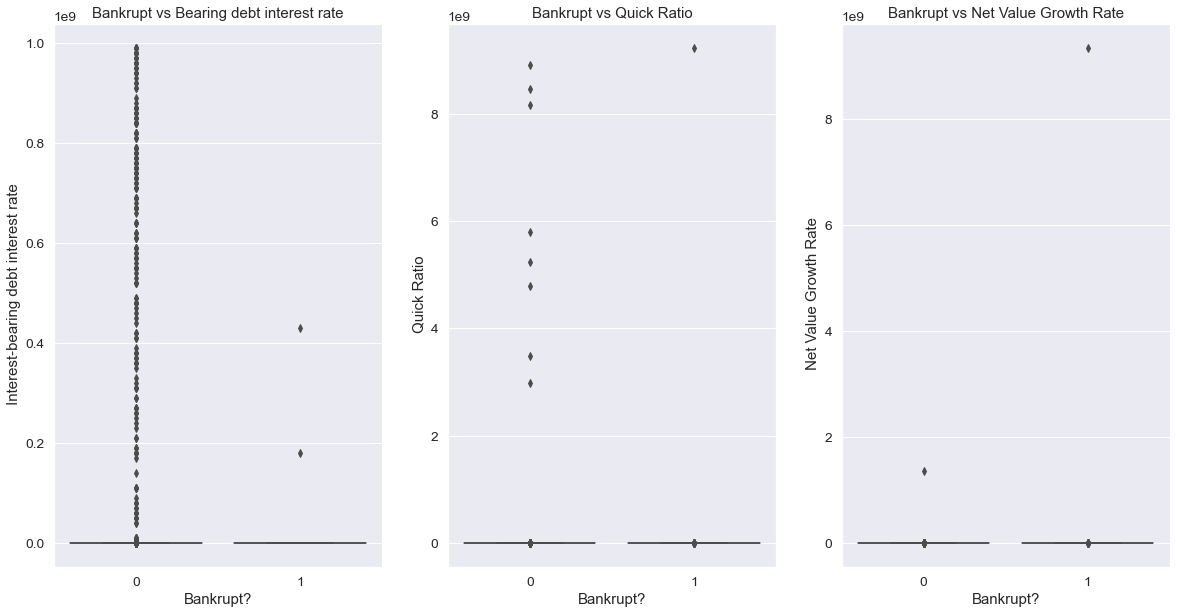

In [12]:
#Checking Boxplots
sns.set(font_scale=1.25)
f, axes = plt.subplots(ncols=3, figsize=(20,10))

sns.boxplot(x='Bankrupt?', y=" Interest-bearing debt interest rate", data=newdf, ax=axes[0])
axes[0].set_title('Bankrupt vs Bearing debt interest rate')

sns.boxplot(x='Bankrupt?', y=" Quick Ratio", data=newdf, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Quick Ratio')


sns.boxplot(x='Bankrupt?', y=" Net Value Growth Rate", data=newdf, ax=axes[2])
axes[2].set_title('Bankrupt vs Net Value Growth Rate')

plt.show()

# Outlier Removal/Imputation 

Remove extreme outliers.

In [13]:
def outliers_removal(feature,feature_name,df):
    
    median = np.percentile(feature, 50)
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    iqr = q3 - q1
    
    
    feat_cut_off = iqr * 1.5
    feat_lower = q1 - feat_cut_off 
    feat_upper = q3 + feat_cut_off
    
    upperoutliers = [x for x in feature if x > feat_upper]
    loweroutliers = [x for x in feature if x < feat_lower]
    print(feature_name + ' upper outliers for bankrupt companys: {}'.format(len(upperoutliers)))
    print(feature_name + ' lower outliers for bankrupt companys: {}'.format(len(loweroutliers)))
 
    df = df.drop(df[(df[feature_name] > feat_upper) | (df[feature_name] < feat_lower)].index)
   
    return df

In [14]:
#Doing Outlier Removal with VT
newdf = outliers_removal(newdf[' Interest-bearing debt interest rate'],' Interest-bearing debt interest rate', newdf)
newdf = outliers_removal(newdf[' Total assets to GNP price'],' Total assets to GNP price', newdf)
newdf = outliers_removal(newdf[' Liability-Assets Flag'],' Liability-Assets Flag', newdf)
newdf = outliers_removal(newdf[' Fixed Assets to Assets'],' Fixed Assets to Assets', newdf)
newdf = outliers_removal(newdf[' Current Asset Turnover Rate'],' Current Asset Turnover Rate', newdf)
newdf = outliers_removal(newdf[' Total income/Total expense'],' Total income/Total expense', newdf)
newdf = outliers_removal(newdf[' Long-term Liability to Current Assets'],' Long-term Liability to Current Assets', newdf)
newdf = outliers_removal(newdf[' Inventory/Current Liability'],' Inventory/Current Liability', newdf)
newdf = outliers_removal(newdf[' Cash/Current Liability'],' Cash/Current Liability', newdf)
newdf = outliers_removal(newdf[' Quick Assets/Current Liability'],' Quick Assets/Current Liability', newdf)
newdf = outliers_removal(newdf[' Allocation rate per person'],' Allocation rate per person', newdf)
newdf = outliers_removal(newdf[' Revenue per person'],' Revenue per person', newdf)
newdf = outliers_removal(newdf[' Fixed Assets Turnover Frequency'],' Fixed Assets Turnover Frequency', newdf)
newdf = outliers_removal(newdf[' Average Collection Days'],' Average Collection Days', newdf)
newdf = outliers_removal(newdf[' Accounts Receivable Turnover'],' Accounts Receivable Turnover', newdf)
newdf = outliers_removal(newdf[' Long-term fund suitability ratio (A)'],' Long-term fund suitability ratio (A)', newdf)
newdf = outliers_removal(newdf[' Total debt/Total net worth'],' Total debt/Total net worth', newdf)
newdf = outliers_removal(newdf[' Quick Ratio'],' Quick Ratio', newdf)
newdf = outliers_removal(newdf[' Current Ratio'],' Current Ratio', newdf)
newdf = outliers_removal(newdf[' Net Value Growth Rate'],' Net Value Growth Rate', newdf)
newdf = outliers_removal(newdf[' Revenue Per Share (Yuan ¥)'],' Revenue Per Share (Yuan ¥)', newdf)
scaler = preprocessing.MinMaxScaler()
names = newdf.columns
d = scaler.fit_transform(newdf)
scaled_newdf = pd.DataFrame(d, columns=names)
scaled_newdf.describe()

 Interest-bearing debt interest rate upper outliers for bankrupt companys: 396
 Interest-bearing debt interest rate lower outliers for bankrupt companys: 0
 Total assets to GNP price upper outliers for bankrupt companys: 755
 Total assets to GNP price lower outliers for bankrupt companys: 0
 Liability-Assets Flag upper outliers for bankrupt companys: 5
 Liability-Assets Flag lower outliers for bankrupt companys: 0
 Fixed Assets to Assets upper outliers for bankrupt companys: 40
 Fixed Assets to Assets lower outliers for bankrupt companys: 0
 Current Asset Turnover Rate upper outliers for bankrupt companys: 1073
 Current Asset Turnover Rate lower outliers for bankrupt companys: 0
 Total income/Total expense upper outliers for bankrupt companys: 263
 Total income/Total expense lower outliers for bankrupt companys: 51
 Long-term Liability to Current Assets upper outliers for bankrupt companys: 289
 Long-term Liability to Current Assets lower outliers for bankrupt companys: 0
 Inventory/Cu

,Bankrupt?,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Accounts Receivable Turnover,Average Collection Days,...,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Total income/Total expense,Current Asset Turnover Rate,Fixed Assets to Assets,Liability-Assets Flag,Total assets to GNP price
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,...,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.0,1502.000000
mean,0.014647,0.334773,0.401002,0.465369,0.432371,0.395001,0.322421,0.302049,0.349623,0.367417,...,0.330397,0.399088,0.201598,0.332307,0.222515,0.469145,0.129423,0.349528,0.0,0.196981
std,0.120176,0.200406,0.210410,0.177967,0.210153,0.206260,0.209689,0.208517,0.222951,0.218940,...,0.196814,0.203721,0.196156,0.198502,0.247334,0.171401,0.101642,0.199226,0.0,0.194075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.215400,0.245955,0.364139,0.267233,0.239445,0.152426,0.146279,0.182946,0.204509,...,0.184813,0.245311,0.064112,0.184576,0.000000,0.370197,0.060521,0.190093,0.0,0.066079
50%,0.000000,0.289474,0.366048,0.441065,0.395498,0.356135,0.277764,0.249484,0.298450,0.348273,...,0.290369,0.360073,0.133717,0.304798,0.136692,0.448242,0.108471,0.314257,0.0,0.122938
75%,0.000000,0.434454,0.525220,0.557417,0.561361,0.532013,0.451882,0.400306,0.469380,0.503889,...,0.435866,0.536438,0.270796,0.445127,0.362345,0.561685,0.170691,0.476288,0.0,0.250636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


Text(0.5, 1.0, 'Net Value Growth Rate')

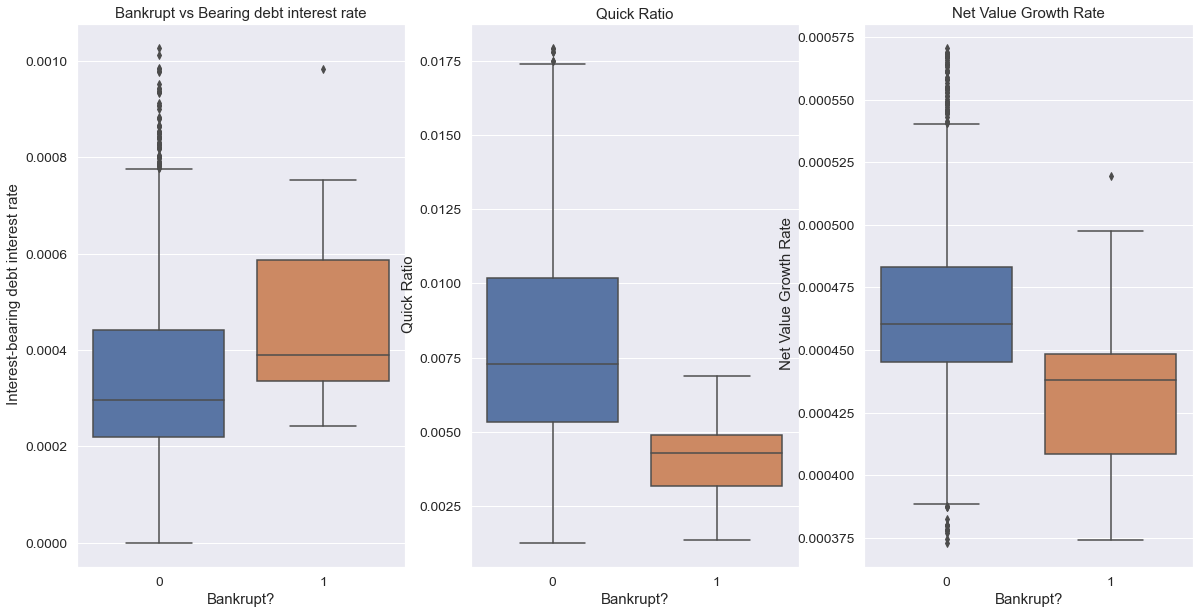

In [15]:
#Checking Boxplots
sns.set(font_scale = 1.25)
f, axes = plt.subplots(ncols=3, figsize=(20,10))

sns.boxplot(x='Bankrupt?', y=" Interest-bearing debt interest rate", data=newdf, ax=axes[0])
axes[0].set_title('Bankrupt vs Bearing debt interest rate')

sns.boxplot(x='Bankrupt?', y=" Quick Ratio", data=newdf, ax=axes[1]) 
axes[1].set_title('Quick Ratio')

sns.boxplot(x='Bankrupt?', y=" Net Value Growth Rate", data=newdf, ax=axes[2]) 
axes[2].set_title('Net Value Growth Rate')

In [16]:
#Doing Outlier Removal with Final Features
final_features = outliers_removal(final_features[' Interest-bearing debt interest rate'],' Interest-bearing debt interest rate', final_features)
final_features = outliers_removal(final_features[' Quick Ratio'],' Quick Ratio', final_features)
final_features = outliers_removal(final_features[' Net Value Growth Rate'],' Net Value Growth Rate', final_features)
final_features = outliers_removal(final_features[' Accounts Receivable Turnover'],' Accounts Receivable Turnover', final_features)
final_features = outliers_removal(final_features[' Total debt/Total net worth'],' Total debt/Total net worth', final_features)
final_features = outliers_removal(final_features[' Debt ratio %'],' Debt ratio %', final_features)
final_features = outliers_removal(final_features[' Operating Profit Rate'],' Operating Profit Rate', final_features)
final_features = outliers_removal(final_features[' Persistent EPS in the Last Four Seasons'],' Persistent EPS in the Last Four Seasons', final_features)

 Interest-bearing debt interest rate upper outliers for bankrupt companys: 396
 Interest-bearing debt interest rate lower outliers for bankrupt companys: 0
 Quick Ratio upper outliers for bankrupt companys: 563
 Quick Ratio lower outliers for bankrupt companys: 0
 Net Value Growth Rate upper outliers for bankrupt companys: 531
 Net Value Growth Rate lower outliers for bankrupt companys: 128
 Accounts Receivable Turnover upper outliers for bankrupt companys: 494
 Accounts Receivable Turnover lower outliers for bankrupt companys: 0
 Total debt/Total net worth upper outliers for bankrupt companys: 227
 Total debt/Total net worth lower outliers for bankrupt companys: 0
 Debt ratio % upper outliers for bankrupt companys: 1
 Debt ratio % lower outliers for bankrupt companys: 0
 Operating Profit Rate upper outliers for bankrupt companys: 165
 Operating Profit Rate lower outliers for bankrupt companys: 244
 Persistent EPS in the Last Four Seasons upper outliers for bankrupt companys: 164
 Pers

In [17]:
final_features.describe()

,Bankrupt?,Interest-bearing debt interest rate,Quick Ratio,Net Value Growth Rate,Accounts Receivable Turnover,Total debt/Total net worth,Debt ratio %,Operating Profit Rate,Persistent EPS in the Last Four Seasons
count,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000
mean,0.017806,0.000352,0.008056,0.000464,0.000989,0.006685,0.115635,0.999023,0.224711
std,0.132264,0.000215,0.004448,0.000036,0.000431,0.003808,0.040284,0.000077,0.014499
min,0.000000,0.000000,0.000125,0.000355,0.000000,0.000312,0.009705,0.998814,0.187482
25%,0.000000,0.000216,0.004881,0.000442,0.000674,0.003681,0.084772,0.998976,0.215562
50%,0.000000,0.000312,0.007042,0.000458,0.000889,0.005972,0.116849,0.999018,0.223598
75%,0.000000,0.000479,0.010275,0.000481,0.001209,0.008952,0.146476,0.999067,0.233431
max,1.000000,0.001026,0.022691,0.000583,0.002451,0.018100,0.197116,0.999234,0.263496


In [18]:
#Normalize dataset 
scaler = preprocessing.MinMaxScaler()
names = final_features.columns
d = scaler.fit_transform(final_features)
scaled_final_features = pd.DataFrame(d, columns=names)
scaled_final_features.describe()

,Bankrupt?,Interest-bearing debt interest rate,Quick Ratio,Net Value Growth Rate,Accounts Receivable Turnover,Total debt/Total net worth,Debt ratio %,Operating Profit Rate,Persistent EPS in the Last Four Seasons
count,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000
mean,0.017806,0.343433,0.351465,0.475379,0.403417,0.358311,0.565230,0.499212,0.489757
std,0.132264,0.209923,0.197099,0.159658,0.175835,0.214090,0.214951,0.184506,0.190746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.210526,0.210757,0.379822,0.274834,0.189378,0.400548,0.387589,0.369403
50%,0.000000,0.304094,0.306508,0.451776,0.362583,0.318210,0.571705,0.486791,0.475124
75%,0.000000,0.466862,0.449768,0.550964,0.493377,0.485748,0.729795,0.604018,0.604478
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.897089e-03,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.833504e-02,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.201838e-14,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.123435e-13,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.366372e-13,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [20]:
mean = np.mean(scaled_data, axis=0)
variance = np.var(scaled_data/mean, axis=0)

from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(scaled_data, threshold):
    average = np.mean(scaled_data, axis=0)
    selector = VarianceThreshold(threshold).fit(scaled_data/average)
    return scaled_data[scaled_data.columns[selector.get_support(indices=True)]]

variancethreshold = VarianceThreshold(5.0).fit(scaled_data/mean)
variancethresholdtransform = variancethreshold.transform(scaled_data/mean)
highvariancecol = scaled_data.columns[variancethreshold.get_support()]
lowvariancecol = scaled_data.columns[~variancethreshold.get_support()]

print("Number of Columns Removed  :",len(lowvariancecol))
print("Number of Columns Remaining :",len(highvariancecol))

Number of Columns Removed  : 74
Number of Columns Remaining : 22


C:\Users\JVW\anaconda3\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [22]:
highvariancecol

Index(['Bankrupt?', ' Interest-bearing debt interest rate',
       ' Revenue Per Share (Yuan ¥)', ' Net Value Growth Rate',
       ' Current Ratio', ' Quick Ratio', ' Total debt/Total net worth',
       ' Long-term fund suitability ratio (A)',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Allocation rate per person', ' Quick Assets/Current Liability',
       ' Cash/Current Liability', ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets', ' Total income/Total expense',
       ' Current Asset Turnover Rate', ' Fixed Assets to Assets',
       ' Liability-Assets Flag', ' Total assets to GNP price'],
      dtype='object')

In [21]:
var_df = pd.DataFrame(variance,columns=['Variance'])
var_df.sort_values(by='Variance').style.background_gradient(sns.light_palette('red', as_cmap=True))

,Variance
Operating Profit Growth Rate,0.000161
Operating Profit Rate,0.000170
Cash Flow to Sales,0.000193
Working capitcal Turnover Rate,0.000227
Working Capital/Equity,0.000252
Pre-tax net Interest Rate,0.000261
Continuous interest rate (after tax),0.000263
After-tax net Interest Rate,0.000283
Net Income to Stockholder's Equity,0.000299
Interest Expense Ratio,0.000317


We removed way too many observations from the dataset, this simply will not do. As seen in the 24 histograms we need to handle outlier removal more carefully, just removing them with the same sutoff rule will not work. 

The only variables that will be considered for outliers will be the "other than fraction only" variables. I also decided the intial bounds for my previous outlier removal aka feat_cutoff = 1.5*IQR to be too small. Thus, my new outlier definition will be: 100th percentile values is at least 100 times greater than 99th percentile, or there are 68 or less records for 100th percentile.
For any variables satisfying my outlier condition I will transform from x-> log(x)

In [23]:
scaled_data[' Current Ratio']

0       8.214412e-13
1       2.187711e-12
2       4.197292e-12
3       1.525112e-12
4       2.189980e-12
            ...     
6814    3.800187e-12
6815    3.367001e-12
6816    1.397222e-11
6817    4.648177e-12
6818    1.867213e-11
Name:  Current Ratio, Length: 6819, dtype: float64

In [22]:
#New Outlier Removal Formula
log_transformed_cols = []
for col in data[non_fraction_columns].columns:
    if (data[col].quantile(1) >= 100* data[col].quantile(0.99)) |  (sum(data[col] > data[col].quantile(0.99)) <= 68):
        data[col] = np.log1p(data[col])
        log_transformed_cols.append(col)
        
## Change names of log transformed column
log_names = "log_" + data[log_transformed_cols].columns
data.rename(columns={data[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)

The following features are log transformed after they fulfill outlier detection condition. 

 [' Accounts Receivable Turnover', ' Allocation rate per person', ' Average Collection Days', ' Cash Turnover Rate', ' Cash/Current Liability', ' Current Ratio', ' Fixed Assets Turnover Frequency', ' Fixed Assets to Assets', ' Inventory Turnover Rate (times)', ' Net Value Growth Rate', ' Operating Expense Rate', ' Quick Asset Turnover Rate', ' Quick Assets/Current Liability', ' Quick Ratio', ' Research and development expense rate', ' Revenue Per Share (Yuan ¥)', ' Revenue per person', ' Total assets to GNP price', ' Total debt/Total net worth']


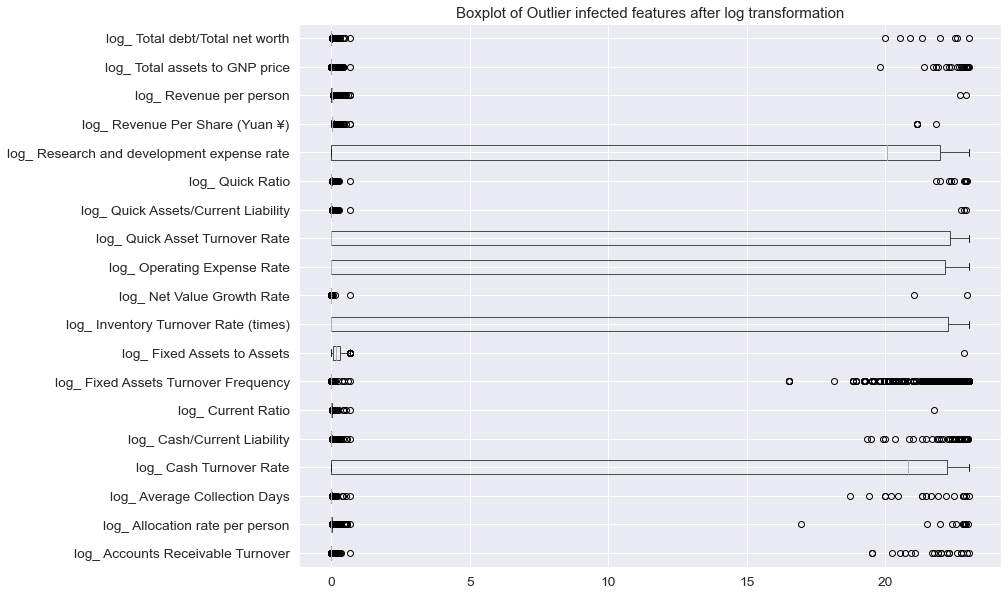

In [23]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
data[log_names].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

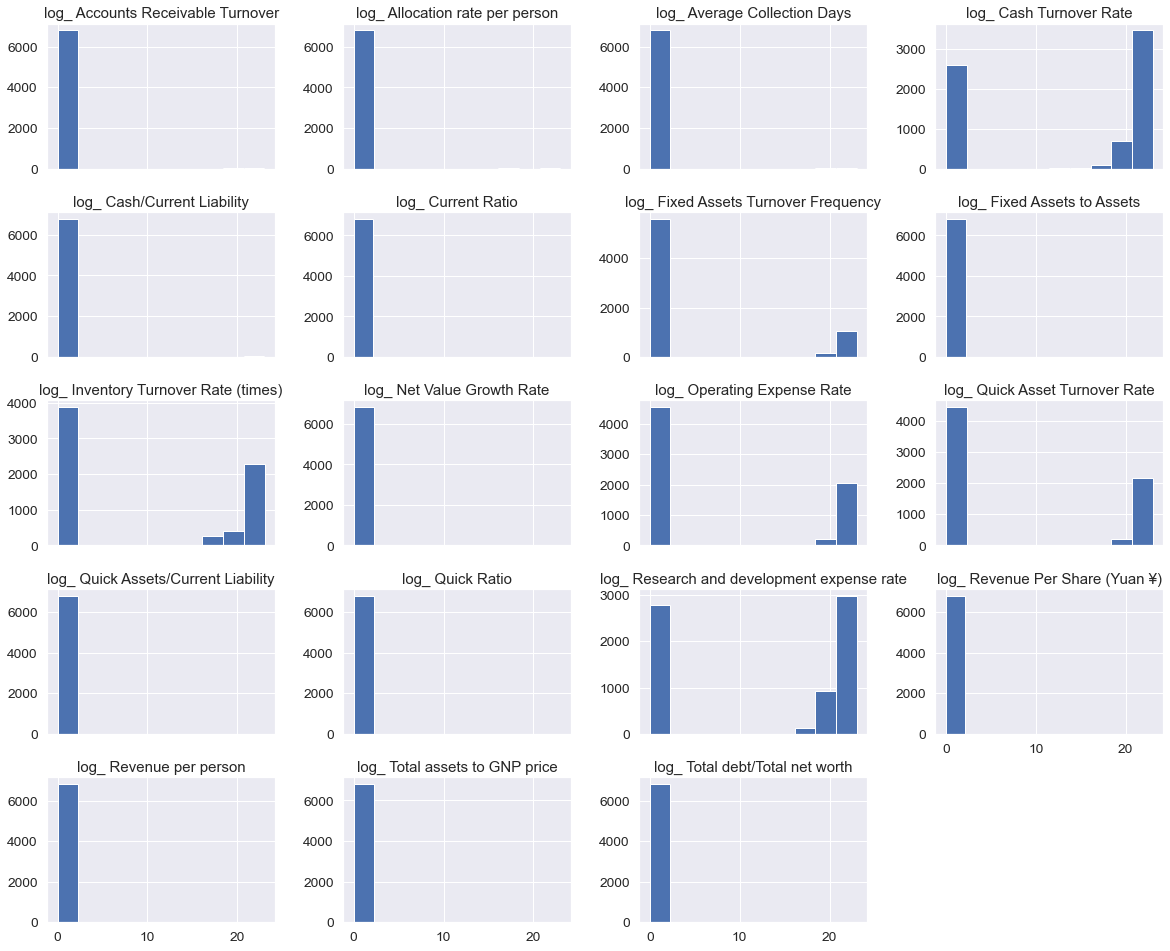

In [24]:
data[log_names].hist(figsize= (20,20),sharex=True,layout= (6,4))
plt.show()

In [25]:
final_features =  data[['Bankrupt?',' Interest-bearing debt interest rate','log_ Quick Ratio',
                       'log_ Net Value Growth Rate','log_ Accounts Receivable Turnover',
                       'log_ Total debt/Total net worth',' Debt ratio %', 
                        ' Operating Profit Rate',' Persistent EPS in the Last Four Seasons']]

In [26]:
scaler = preprocessing.MinMaxScaler()
names = final_features.columns
d = scaler.fit_transform(final_features)
scaled_final_features = pd.DataFrame(d, columns=names)
scaled_final_features.describe()

,Bankrupt?,Interest-bearing debt interest rate,log_ Quick Ratio,log_ Net Value Growth Rate,log_ Accounts Receivable Turnover,log_ Total debt/Total net worth,Debt ratio %,Operating Profit Rate,Persistent EPS in the Last Four Seasons
count,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,1.661415e-02,0.001768,0.000309,0.003135,0.001441,0.113177,0.998755,0.228813
std,0.176710,1.093687e-01,0.035595,0.016423,0.053569,0.032155,0.053920,0.013010,0.033263
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.050710e-13,0.000205,0.000019,0.000031,0.000130,0.072891,0.998969,0.214711
50%,0.000000,3.242749e-13,0.000322,0.000020,0.000042,0.000240,0.111407,0.999022,0.224544
75%,0.000000,5.379326e-13,0.000531,0.000022,0.000063,0.000401,0.148804,0.999095,0.238820
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

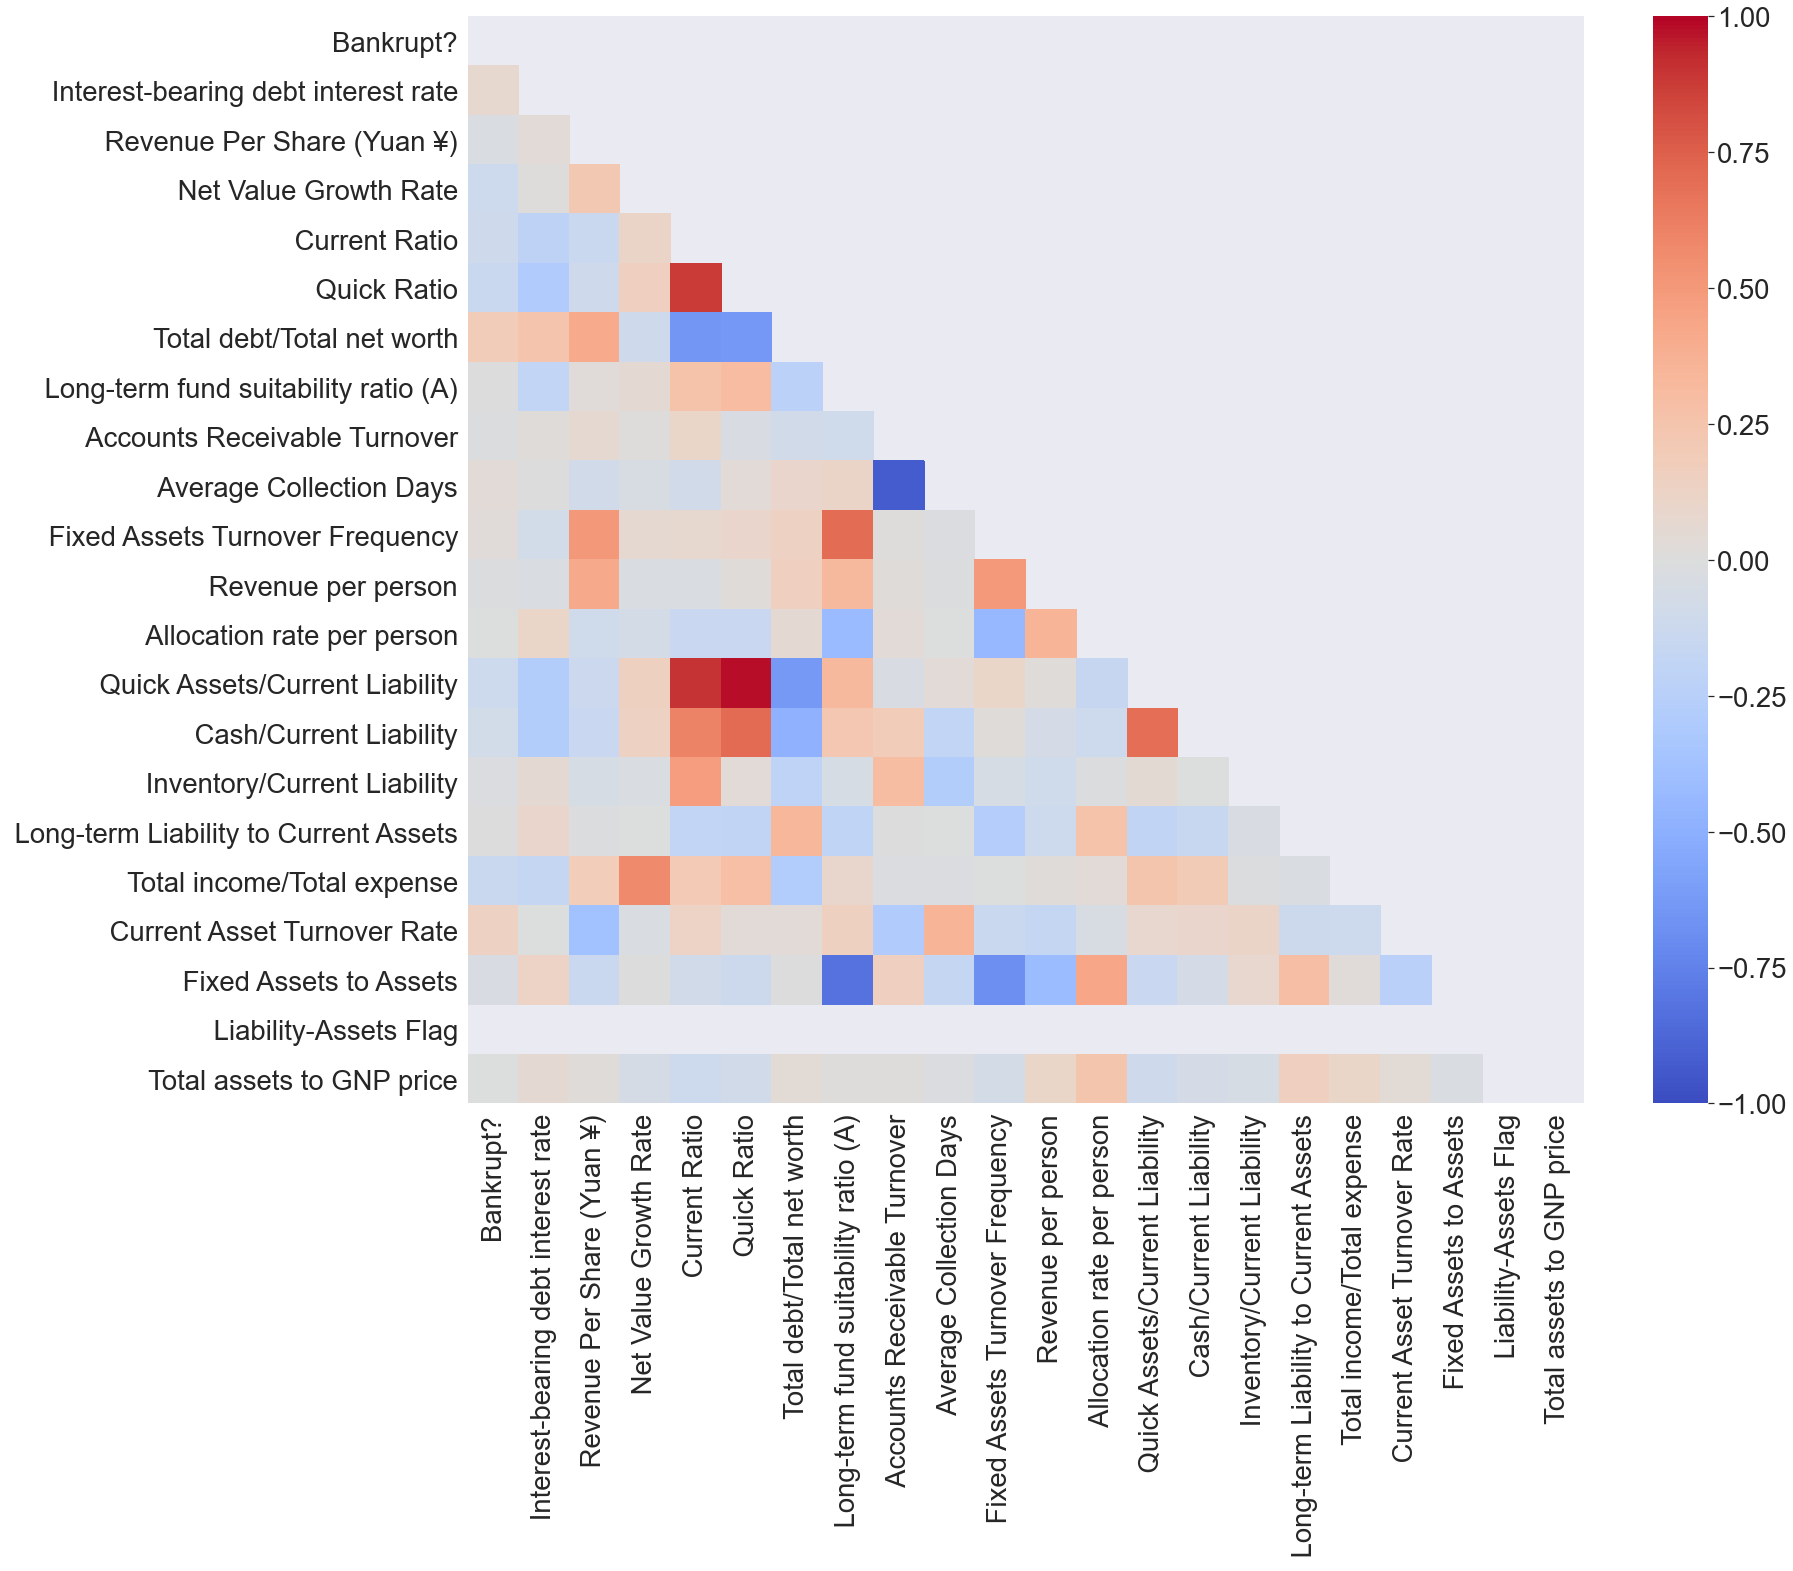

In [27]:
sns.set(font_scale=2.5)
matrix = newdf.corr('pearson')
plt.subplots(figsize=(25, 20))
sns.heatmap(newdf.corr('pearson'), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = np.triu(np.ones_like(matrix)))

In [28]:
matrix.columns

Index(['Bankrupt?', ' Interest-bearing debt interest rate',
       ' Revenue Per Share (Yuan ¥)', ' Net Value Growth Rate',
       ' Current Ratio', ' Quick Ratio', ' Total debt/Total net worth',
       ' Long-term fund suitability ratio (A)',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Allocation rate per person', ' Quick Assets/Current Liability',
       ' Cash/Current Liability', ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets', ' Total income/Total expense',
       ' Current Asset Turnover Rate', ' Fixed Assets to Assets',
       ' Liability-Assets Flag', ' Total assets to GNP price'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

Y = data['Bankrupt?']
X = data.drop('Bankrupt?', axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y, test_size=0.3
)

# Recursive Feature Elimination

In [30]:
#Effects of feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
# determining optimal number of features
n_features = [5, 10, 15, 20, 25]
for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, Y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, Y_train).score(X_test_rfe, Y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

Test score: 0.965  number of features: 5
Test score: 0.965  number of features: 10
Test score: 0.969  number of features: 15
Test score: 0.966  number of features: 20
Test score: 0.967  number of features: 25


It seems like By the time we hit 15 features our Test Score does not seem to improve as much/at all.

In [31]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)

select.fit(X_train, Y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

features = pd.DataFrame({'features':list(data.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt?')

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Relative Importance', ylabel='Important Variables'>

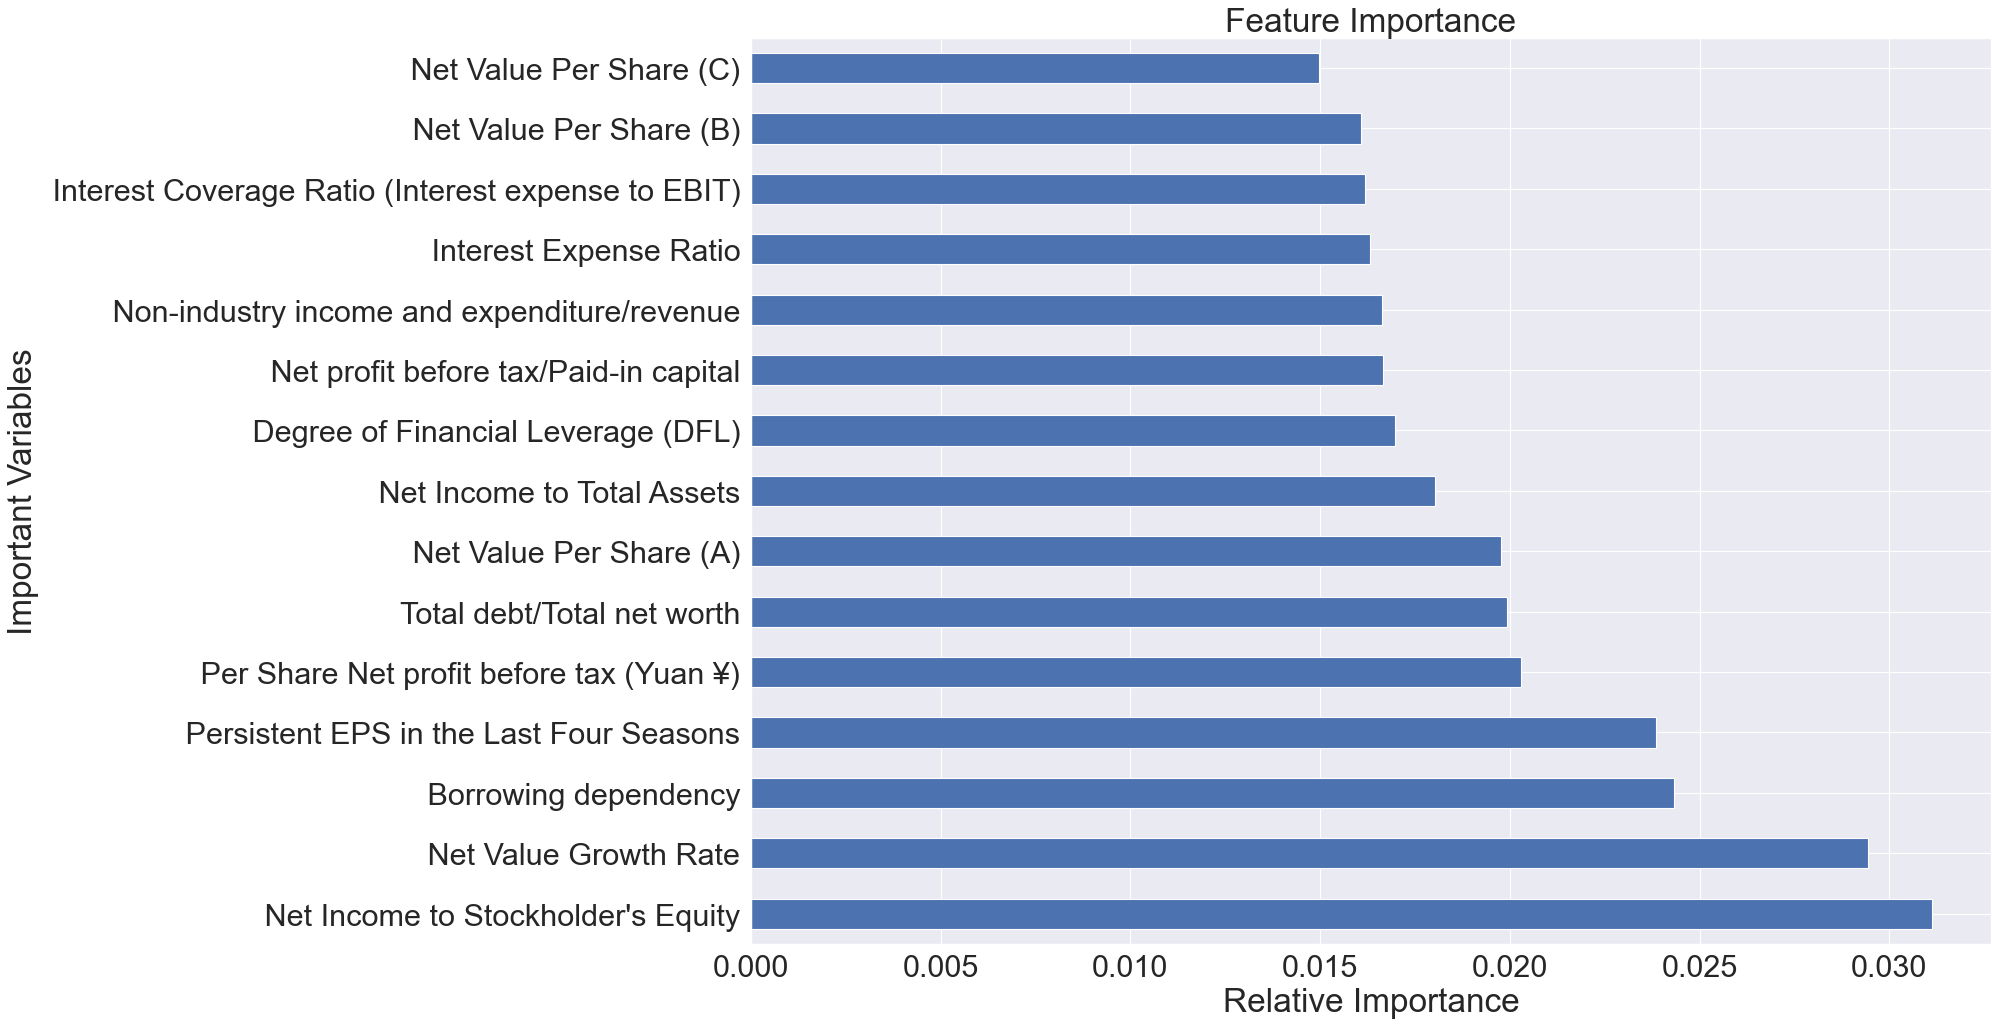

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, Y)
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Relative Importance')
plt.ylabel('Important Variables')
plt.title('Feature Importance')
(pd.Series(model.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh'))

In [33]:
data[features].columns

Index([' Interest-bearing debt interest rate', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Cash/Current Liability',
       ' Working Capital/Equity', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)', 'Bankrupt?'],
      dtype='object')

In [34]:
#Using this method to return features that RFE and VarianceThreshold have in common
new_list = []
for element in highvariancecol:
    if element in data[features].columns:
        new_list.append(element)
new_list

['Bankrupt?',
 ' Interest-bearing debt interest rate',
 ' Net Value Growth Rate',
 ' Quick Ratio',
 ' Accounts Receivable Turnover',
 ' Cash/Current Liability']

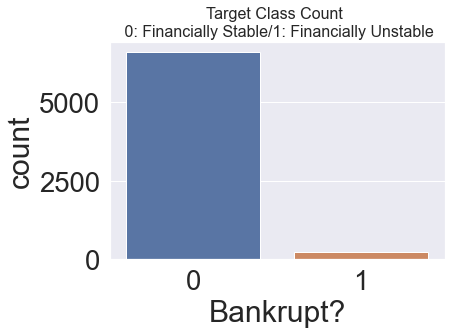

In [60]:
sns.countplot(x = final_features['Bankrupt?'])
plt.title('Target Class Count \n 0: Financially Stable/1: Financially Unstable', fontsize=16)
plt.show()

In [61]:
#I want to see specifically how much more the 0's make up the data rather than 
print('Financially stable: ', round(final_features['Bankrupt?'].value_counts()[0] ,2), ' of the dataset')
print('Financially unstable: ', round(final_features['Bankrupt?'].value_counts()[1] ,2), ' of the dataset')

Financially stable:  6599  of the dataset
Financially unstable:  220  of the dataset


In [29]:
Y = scaled_final_features['Bankrupt?']
X = scaled_final_features.drop('Bankrupt?', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y, test_size=0.3)

In [30]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

Logistic_Model = LogisticRegression().fit(X_train,Y_train)
Logistic_Predict = Logistic_Model.predict(X_test)

print(classification_report(Y_test, Logistic_Predict))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1980
         1.0       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046



In [31]:
from sklearn import metrics
lr_pred = Logistic_Model.predict_proba(X_test)  ## predicted probabilities
lr_pred = lr_pred[:,1]  #prob(Bankrupt=0)
lr_auc = metrics.roc_auc_score(Y_test,lr_pred)   #AUC
print('Logistic Regression AUC=%.3f' % (lr_auc))

Logistic Regression AUC=0.892


In [32]:
logconmat = confusion_matrix(Y_test, Logistic_Predict)
heat_logconmat = pd.DataFrame(logconmat, columns=np.unique(Y_test), index = np.unique(Y_test))
heat_logconmat.index.name = 'Actual'
heat_logconmat.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

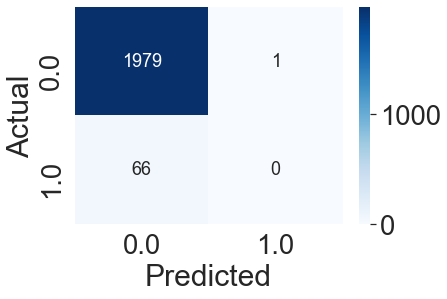

In [33]:
sns.heatmap(heat_logconmat, cmap="Blues", annot=True, annot_kws={"size": 18},fmt='g')

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train,Y_train)
RFmodel_Predict = RFmodel.predict(X_test)
print(classification_report(Y_test, RFmodel_Predict))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1980
         1.0       0.37      0.15      0.22        66

    accuracy                           0.96      2046
   macro avg       0.67      0.57      0.60      2046
weighted avg       0.95      0.96      0.96      2046



In [35]:
RF_pred = RFmodel.predict_proba(X_test)  ## predicted probabilities
RF_pred = RF_pred[:,1]  #prob(Bankrupt=0)
RF_auc = metrics.roc_auc_score(Y_test,RF_pred)   #AUC
print('Random Forest AUC=%.3f' % (RF_auc))

Random Forest AUC=0.887


In [36]:
GB_Model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
GB_Model_Predict = GB_Model.predict(X_test)
print(classification_report(Y_test, GB_Model_Predict))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1980
         1.0       0.50      0.02      0.03        66

    accuracy                           0.97      2046
   macro avg       0.73      0.51      0.51      2046
weighted avg       0.95      0.97      0.95      2046



In [37]:
GB_pred = GB_Model.predict_proba(X_test)  ## predicted probabilities
GB_pred = GB_pred[:,1]  #prob(Bankrupt=0)
GB_auc = metrics.roc_auc_score(Y_test,GB_pred)   #AUC
print('Gradient Boosting AUC=%.3f' % (GB_auc))

Gradient Boosting AUC=0.408


In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
#XGBOOST
from xgboost import XGBClassifier
XG_Model = XGBClassifier(n_estimators=100, use_label_encoder=False).fit(X_train, Y_train)
XG_Model_Predict = XG_Model.predict(X_test)
print(classification_report(Y_test, XG_Model_Predict))

[14:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1980
         1.0       0.48      0.30      0.37        66

    accuracy                           0.97      2046
   macro avg       0.73      0.65      0.68      2046
weighted avg       0.96      0.97      0.96      2046



In [40]:
XG_pred = XG_Model.predict_proba(X_test)  ## predicted probabilities
XG_pred = XG_pred[:,1]  #prob(Bankrupt=0)
XG_auc = metrics.roc_auc_score(Y_test,XG_pred)   #AUC
print('XGBOOST AUC=%.3f' % (XG_auc))

XGBOOST AUC=0.904


# Separate majority and minority classes
from sklearn.utils import resample

df_majority = scaled_final_features[scaled_final_features['Bankrupt?']==0]
df_minority = scaled_final_features[scaled_final_features['Bankrupt?']==1]
 
# Upsample minor.ity class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6599,    # to match majority class
                                 random_state=1) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Bankrupt?'].value_counts()

Y = df_upsampled['Bankrupt?']
X = df_upsampled.drop('Bankrupt?', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [51]:
# Undersampling
# Separate majority and minority classes
df_majority = scaled_final_features[scaled_final_features['Bankrupt?']==0]
df_minority = scaled_final_features[scaled_final_features['Bankrupt?']==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,  # sample without replacement
                                 n_samples=220,  # to match minority class
                                 random_state=1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['Bankrupt?'].value_counts()

1.0    220
0.0    220
Name: Bankrupt?, dtype: int64

In [52]:
#Run These Lines After Running All The Models With Upsample
Y = df_downsampled['Bankrupt?']
X = df_downsampled.drop('Bankrupt?', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [65]:
# Logistic With Undersample
Logistic_Model = LogisticRegression().fit(X_train,Y_train)
Logistic_Predict = Logistic_Model.predict(X_test)

print(classification_report(Y_test, Logistic_Predict))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      1920
         1.0       0.85      0.84      0.84      2040

    accuracy                           0.84      3960
   macro avg       0.84      0.84      0.84      3960
weighted avg       0.84      0.84      0.84      3960



In [66]:
lr_pred = Logistic_Model.predict_proba(X_test)  ## predicted probabilities
lr_pred = lr_pred[:,1]  #prob(Bankrupt=0)

lr_fpr, lr_tpr, _ = metrics.roc_curve(Y_test,  lr_pred)  #fpr, tpr for AUC
lr_auc = metrics.roc_auc_score(Y_test,lr_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table.set_index('classifiers', inplace=True)
result_table = result_table.append({'classifiers':"Logistic Regression",
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':lr_auc}, ignore_index=True)

print('Logistic Regression AUC=%.3f' % (lr_auc))

Logistic Regression AUC=0.925


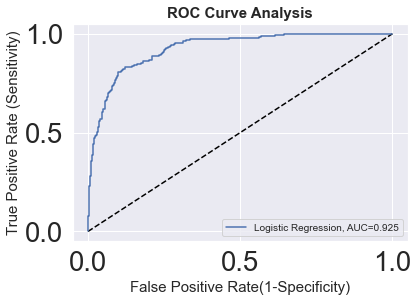

In [67]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [68]:
# Random Forest With Undersample
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train,Y_train)
RFmodel_Predict = RFmodel.predict(X_test)
print(classification_report(Y_test, RFmodel_Predict))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1920
         1.0       0.99      1.00      0.99      2040

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [69]:
rf_pred = RFmodel.predict_proba(X_test)  ## predicted probabilities
rf_pred = rf_pred[:,1]  #prob(Bankrupt=0)

rf_fpr, rf_tpr, _ = metrics.roc_curve(Y_test,  rf_pred)  #fpr, tpr for AUC
rf_auc = metrics.roc_auc_score(Y_test,rf_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = result_table.append({'classifiers':"Random Forest",
                                        'fpr':rf_fpr, 
                                        'tpr':rf_tpr, 
                                        'auc':rf_auc}, ignore_index=True)

print('Random Forest AUC=%.3f' % (rf_auc))

Random Forest AUC=1.000


In [71]:
#GB Model With UnderSample
GB_Model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
GB_Model_Predict = GB_Model.predict(X_test)
print(classification_report(Y_test, GB_Model_Predict))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1920
         1.0       0.90      0.93      0.92      2040

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



In [72]:
GB_pred = GB_Model.predict_proba(X_test)  ## predicted probabilities
GB_pred = GB_pred[:,1]  #prob(Bankrupt=0)

GB_fpr, GB_tpr, _ = metrics.roc_curve(Y_test,  GB_pred)  #fpr, tpr for AUC
GB_auc = metrics.roc_auc_score(Y_test,GB_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = result_table.append({'classifiers':"Gradient Boosting",
                                        'fpr':GB_fpr, 
                                        'tpr':GB_tpr, 
                                        'auc':GB_auc}, ignore_index=True)

print('Gradient Boosting AUC=%.3f' % (GB_auc))

Gradient Boosting AUC=0.968


In [73]:
#XGBOOST With UnderSample
XG_Model = XGBClassifier(n_estimators=100, use_label_encoder=False).fit(X_train, Y_train)
XG_Model_Predict = XG_Model.predict(X_test)
print(classification_report(Y_test, XG_Model_Predict))

[16:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1920
         1.0       0.98      1.00      0.99      2040

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [74]:
XG_pred = XG_Model.predict_proba(X_test)  ## predicted probabilities
XG_pred = XG_pred[:,1]  #prob(Bankrupt=0)

XG_fpr, XG_tpr, _ = metrics.roc_curve(Y_test,  XG_pred)  #fpr, tpr for AUC
XG_auc = metrics.roc_auc_score(Y_test,XG_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = result_table.append({'classifiers':"XGBOOST",
                                        'fpr':XG_fpr, 
                                        'tpr':XG_tpr, 
                                        'auc':XG_auc}, ignore_index=True)

print('XGBOOST AUC=%.3f' % (XG_auc))

XGBOOST AUC=1.000


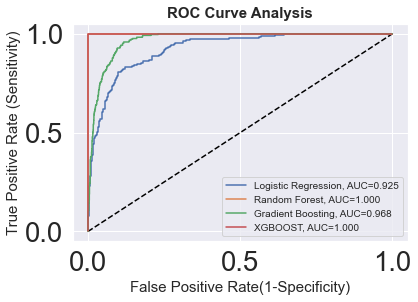

In [75]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(rf_fpr,rf_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(GB_fpr,GB_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.plot(XG_fpr,XG_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[3,'classifiers'], result_table.loc[3]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

ADA vs Gradient Boosting

Both are boosting algorithms which means that they convert a set of weak learners into a single strong learner. They both initialize a strong learner (usually a decision tree) and iteratively create a weak learner that is added to the strong learner. They differ on how they create the weak learners during the iterative process.
At each iteration, adaptive boosting changes the sample distribution by modifying the weights attached to each of the instances. It increases the weights of the wrongly predicted instances and decreases the ones of the correctly predicted instances. The weak learner thus focuses more on the difficult instances. After being trained, the weak learner is added to the strong one according to his performance (so-called alpha weight). The higher it performs, the more it contributes to the strong learner.

On the other hand, gradient boosting doesn’t modify the sample distribution. Instead of training on a newly sample distribution, the weak learner trains on the remaining errors (so-called pseudo-residuals) of the strong learner. It is another way to give more importance to the difficult instances. At each iteration, the pseudo-residuals are computed and a weak learner is fitted to these pseudo-residuals. Then, the contribution of the weak learner (so-called multiplier) to the strong one isn’t computed according to his performance on the newly distribution sample but using a gradient descent optimization process. The computed contribution is the one minimizing the overall error of the strong learner.

Both xgboost and gbm follows the principle of gradient boosting. There are however, the difference in modeling details. Specifically, xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

Use

logit
SVM
RF
GB
XGB

Shape of X before SMOTE: (6819, 8)
Shape of X after SMOTE: (13198, 8)
Shape of Y before SMOTE: (6819,)
Shape of Y after SMOTE: (13198,)

Balance of positive and negative classes (%):
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1994
         1.0       0.82      0.84      0.83      1966

    accuracy                           0.82      3960
   macro avg       0.83      0.83      0.82      3960
weighted avg       0.83      0.82      0.82      3960



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

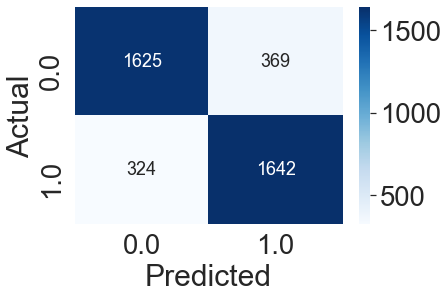

In [41]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, Y_sm = sm.fit_resample(X, Y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print(f'''Shape of Y before SMOTE: {Y.shape}
Shape of Y after SMOTE: {Y_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
Y_sm.value_counts(normalize=True) * 100

X_train_sm, X_test_sm, Y_train_sm, Y_test_sm = train_test_split(X_sm, Y_sm, test_size=0.3)
Logistic_Model_sm = LogisticRegression().fit(X_train_sm,Y_train_sm)
Logistic_Predict_sm = Logistic_Model_sm.predict(X_test_sm)

print(classification_report(Y_test_sm, Logistic_Predict_sm))

logconmatsm = confusion_matrix(Y_test_sm, Logistic_Predict_sm)
heat_logconmatsm = pd.DataFrame(logconmatsm, columns=np.unique(Y_test_sm), index = np.unique(Y_test_sm))
heat_logconmatsm.index.name = 'Actual'
heat_logconmatsm.columns.name = 'Predicted'
sns.heatmap(heat_logconmatsm, cmap="Blues", annot=True, annot_kws={"size": 18},fmt='g')

In [42]:
lr_pred = Logistic_Model.predict_proba(X_test_sm)  ## predicted probabilities
lr_pred = lr_pred[:,1]  #prob(Bankrupt=0)
lr_auc = metrics.roc_auc_score(Y_test_sm,lr_pred)   #AUC
print('Logistic Regression AUC=%.3f' % (lr_auc))

Logistic Regression AUC=0.896


In [43]:
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_sm,Y_train_sm)
RFmodel_Predict = RFmodel.predict(X_test_sm)
print(classification_report(Y_test_sm, RFmodel_Predict))
RF_pred = RFmodel.predict_proba(X_test_sm)  ## predicted probabilities
RF_pred = RF_pred[:,1]  #prob(Bankrupt=0)
RF_auc = metrics.roc_auc_score(Y_test_sm,RF_pred)   #AUC
print('Random Forest AUC=%.3f' % (RF_auc))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1994
         1.0       0.95      0.98      0.96      1966

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.97      0.96      0.96      3960

Random Forest AUC=0.993


In [44]:
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_sm,Y_train_sm)
RFmodel_Predict = RFmodel.predict(X_test_sm)
print(classification_report(Y_test_sm, RFmodel_Predict))
RF_pred = RFmodel.predict_proba(X_test_sm)  ## predicted probabilities
RF_pred = RF_pred[:,1]  #prob(Bankrupt=0)
RF_auc = metrics.roc_auc_score(Y_test_sm,RF_pred)   #AUC
print('Random Forest AUC=%.3f' % (RF_auc))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1994
         1.0       0.95      0.98      0.96      1966

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.97      0.96      0.96      3960

Random Forest AUC=0.993


In [45]:
GB_Model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_sm, Y_train_sm)
GB_Model_Predict = GB_Model.predict(X_test_sm)
print(classification_report(Y_test_sm, GB_Model_Predict))
GB_pred = GB_Model.predict_proba(X_test_sm)  ## predicted probabilities
GB_pred = GB_pred[:,1]  #prob(Bankrupt=0)
GB_auc = metrics.roc_auc_score(Y_test_sm,GB_pred)   #AUC
print('Random Forest AUC=%.3f' % (GB_auc))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1994
         1.0       0.87      0.90      0.88      1966

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960

Random Forest AUC=0.948


In [46]:
XG_Model = XGBClassifier(n_estimators=100, use_label_encoder=False).fit(X_train_sm, Y_train_sm)
XG_Model_Predict = XG_Model.predict(X_test_sm)
print(classification_report(Y_test_sm, XG_Model_Predict))
XG_pred = XG_Model.predict_proba(X_test_sm)  ## predicted probabilities
XG_pred = XG_pred[:,1]  #prob(Bankrupt=0)
XG_auc = metrics.roc_auc_score(Y_test_sm,XG_pred)   #AUC
print('Random Forest AUC=%.3f' % (XG_auc))

[14:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1994
         1.0       0.95      0.98      0.97      1966

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

Random Forest AUC=0.991


In [52]:
lr_pred = Logistic_Model_sm.predict_proba(X_test)
lr_pred = lr_pred[:,1]
rf_pred = RFmodel.predict_proba(X_test)
rf_pred = rf_pred[:,1]
GB_pred = GB_Model.predict_proba(X_test)
GB_pred = GB_pred[:,1]
XG_pred = XG_Model.predict_proba(X_test)
XG_pred = XG_pred[:,1]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table.set_index('classifiers', inplace=True)

lr_fpr, lr_tpr, _ = metrics.roc_curve(Y_test,  lr_pred)
rf_fpr, rf_tpr, _ = metrics.roc_curve(Y_test,  rf_pred)
GB_fpr, GB_tpr, _ = metrics.roc_curve(Y_test,  GB_pred)
XG_fpr, XG_tpr, _ = metrics.roc_curve(Y_test,  XG_pred)

lr_auc = metrics.roc_auc_score(Y_test,lr_pred)
rf_auc = metrics.roc_auc_score(Y_test,rf_pred)
GB_auc = metrics.roc_auc_score(Y_test,GB_pred)
XG_auc = metrics.roc_auc_score(Y_test,XG_pred)   

result_table = result_table.append({'classifiers':"Logistic Regression",
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':lr_auc}, ignore_index=True)
result_table = result_table.append({'classifiers':"Random Forest",
                                        'fpr':rf_fpr, 
                                        'tpr':rf_tpr, 
                                        'auc':rf_auc}, ignore_index=True)
result_table = result_table.append({'classifiers':"Gradient Boosting",
                                        'fpr':GB_fpr, 
                                        'tpr':GB_tpr, 
                                        'auc':GB_auc}, ignore_index=True)
result_table = result_table.append({'classifiers':"XGBOOST",
                                        'fpr':XG_fpr, 
                                        'tpr':XG_tpr, 
                                        'auc':XG_auc}, ignore_index=True)

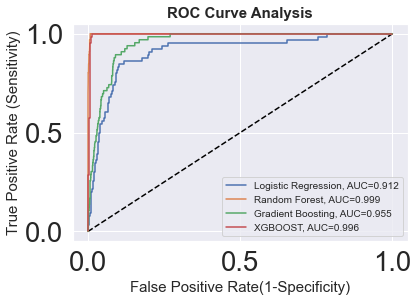

In [53]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(rf_fpr,rf_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(GB_fpr,GB_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.plot(XG_fpr,XG_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[3,'classifiers'], result_table.loc[3]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.
There are 37K data points instead of 25K, and the class balance is perfect — 50:50.